# Data Processing in NLP and Opinion Mining

### Importing Required Packages and Importing Dataset

In [1]:
#import required packages
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import STOPWORDS, WordCloud
import nltk
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from textblob import TextBlob

In [2]:
#import required dataset into pandas dataframe
df = pd.read_csv("E:\\Datasets\\Restaurant_Reviews.tsv", sep="\t")

In [3]:
#printing dataset shape
print("Dataset Shape : ", df.shape)

#printing dataset observations
print("Columns present in dataset : ",list(df))
df.head()

Dataset Shape :  (1000, 2)
Columns present in dataset :  ['Review', 'Liked']


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
#printing a single row
display(df.iloc[5])

Review    Now I am getting angry and I want my damn pho.
Liked                                                  0
Name: 5, dtype: object

In [5]:
#printing a single review
df.iloc[3]['Review']

'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'

In [6]:
#obtaining information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### Presenting the Data

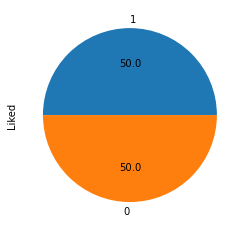

In [7]:
#present the summary of sentiment values using pie chart 
df.Liked.value_counts().plot(kind='pie',autopct='%.1f')

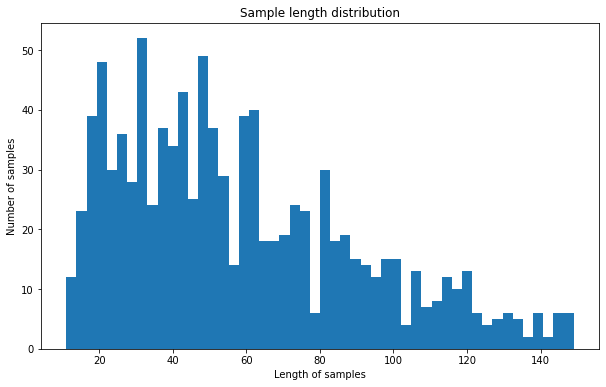

In [8]:
#present the average number of words per sample
plt.figure(figsize=(10, 6))
plt.hist([len(sample) for sample in list(df['Review'])], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

### Processing the Data

**Tokenize the Reviews**

In [9]:
#function to tokenize the reviews and removing punctuations for each row
def identify_tokens(row):
    review = row['Review']
    tokens = nltk.word_tokenize(review)
    #remove punctuations
    token_words = [word for word in tokens if word.isalnum()]
    return token_words

#storing the tokens in another column by applying the function to each row
df['Review_tokens'] = df.apply(identify_tokens, axis=1)

In [10]:
print(list(df))

['Review', 'Liked', 'Review_tokens']


In [11]:
#data before tokenization
df.iloc[0]['Review']

'Wow... Loved this place.'

In [12]:
#data after tokenization
print(df.iloc[0]['Review_tokens'])

['Wow', 'Loved', 'this', 'place']


**Stemming the Tokens**

In [13]:
#create a stemmer object
stemming = PorterStemmer()

#function to stem the tokens obtained
def stem_list(row):
    my_review = row['Review_tokens']
    stemmed_list = [stemming.stem(w) for w in my_review]
    return stemmed_list

#storing the stemmed data in another column by applying the function to each row
df['Review_Stemmed'] = df.apply(stem_list, axis=1)

In [14]:
print(list(df))

['Review', 'Liked', 'Review_tokens', 'Review_Stemmed']


In [15]:
#data after tokenization
print(df.iloc[5]['Review_tokens'])

['Now', 'I', 'am', 'getting', 'angry', 'and', 'I', 'want', 'my', 'damn', 'pho']


In [16]:
#data after stemming
print(df.iloc[5]['Review_Stemmed'])

['now', 'I', 'am', 'get', 'angri', 'and', 'I', 'want', 'my', 'damn', 'pho']


**Lemmatize the Tokens**

In [17]:
#create a lemmatizer object
lemmatizer = nltk.WordNetLemmatizer()

#function to lemmatize the tokens obtained
def review_lemmatize(text):
    text = [lemmatizer.lemmatize(t) for t in text]
    text = [lemmatizer.lemmatize(t, 'v') for t in text]
    return text

#storing the lemmatized data in another column by applying the function to each row
df['Review_lemmatized'] = df['Review_tokens'].apply(lambda x: review_lemmatize(x))

In [18]:
print(list(df))

['Review', 'Liked', 'Review_tokens', 'Review_Stemmed', 'Review_lemmatized']


In [19]:
print(df.iloc[5]['Review_tokens'])

['Now', 'I', 'am', 'getting', 'angry', 'and', 'I', 'want', 'my', 'damn', 'pho']


In [20]:
print(df.iloc[5]['Review_lemmatized'])

['Now', 'I', 'be', 'get', 'angry', 'and', 'I', 'want', 'my', 'damn', 'pho']


**Remove Stopwords**

In [21]:
#obtain stopwords from nltk package
sw1 = (set(stopwords.words('english')))

In [22]:
#Customizing the stopwords
stopwords = (sw1.union(set(["I","The","This","We","It","wa","k","get","ought","however","they'd","i'm", 'ought', "she'll",
            "they're", 'www', "i'll", "we've", 'hence', 'ever', "he'd", 'otherwise',"what's", "who's", "he's", 'since',
            'would', 'also', "when's", "i'd", 'else', 'shall', 'r', "i've", "how's", "where's", 'like', "let's", 'com',
            'http', "we're", "he'll", 'get', "we'll","that's", "there's", 'therefore', "why's", "we'd", "she'd", "they've",
                    "they'll", 'could', "here's"])))
stopwords = (stopwords-(set(["not"])))
#displaying the set of stopwords
print (stopwords)

{'because', "weren't", 'hasn', 'here', 'had', "hadn't", 'yourselves', 'this', 'that', 'if', 'between', 'they', 'does', "we'd", "aren't", 'however', 'should', 'against', 'from', 'how', 'during', "i'll", 'mustn', 'in', 'shan', 'to', 'him', 'itself', 'can', 'com', 'which', 'up', 'a', 'all', "that's", 'these', 'the', 'just', 'by', 'before', "let's", 'won', 'below', 'hadn', "who's", 'd', 'for', 'but', 'would', 'on', 'again', 'theirs', "you're", 'been', 'of', "they've", "shan't", 'ought', 'more', 'ain', 've', 'http', 'after', 'm', 'into', "haven't", "when's", "mustn't", "why's", 'get', 'at', 'was', 'your', "you'd", "i'd", "here's", 'also', "shouldn't", 'only', "mightn't", 'as', 'needn', "wouldn't", "they're", "you've", "she'd", 'his', 'ever', 's', 'any', "how's", 'did', 'didn', 'you', 'otherwise', 'than', "it's", "wasn't", 'what', 'mightn', 're', 'such', "couldn't", 'same', 'do', "doesn't", 'therefore', 'or', 'out', 'where', 'wasn', 'most', 'It', 'over', 'own', 'through', "hasn't", 'doing', 

In [23]:
#function to remove stopwords from the lemmatized data
def remove_stopwords(row):
    mylist = row['Review_lemmatized']
    without_stopwords = [word for word in mylist if not word in stopwords]
    return (without_stopwords)

#storing data without stopwords in another column by applying the function to each row
df['Review_without_stopwords'] = df.apply(remove_stopwords, axis=1)

In [24]:
print(list(df))

['Review', 'Liked', 'Review_tokens', 'Review_Stemmed', 'Review_lemmatized', 'Review_without_stopwords']


In [25]:
df.iloc[5]['Review_lemmatized']

['Now', 'I', 'be', 'get', 'angry', 'and', 'I', 'want', 'my', 'damn', 'pho']

In [26]:
print(df.iloc[5]['Review_without_stopwords'])

['Now', 'angry', 'want', 'damn', 'pho']


**Rejoining the words**

In [27]:
#function to rejoin the words to form strings from tokens
def rejoin_words(row):
    my_list = row['Review_without_stopwords']
    joined_words = ( " ".join(my_list))
    return joined_words

#storing data after joining in another column by applying the function to each row
df['Review_processed'] = df.apply(rejoin_words, axis=1)

In [28]:
print(list(df))

['Review', 'Liked', 'Review_tokens', 'Review_Stemmed', 'Review_lemmatized', 'Review_without_stopwords', 'Review_processed']


In [29]:
print(df.iloc[0]['Review_without_stopwords'])

['Wow', 'Loved', 'place']


In [30]:
print(df.iloc[0]['Review_processed'])

Wow Loved place


In [31]:
df.head()

,Review,Liked,Review_tokens,Review_Stemmed,Review_lemmatized,Review_without_stopwords,Review_processed
0,Wow... Loved this place.,1,"[Wow, Loved, this, place]","[wow, love, thi, place]","[Wow, Loved, this, place]","[Wow, Loved, place]",Wow Loved place
1,Crust is not good.,0,"[Crust, is, not, good]","[crust, is, not, good]","[Crust, be, not, good]","[Crust, not, good]",Crust not good
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nasty]","[not, tasti, and, the, textur, wa, just, nasti]","[Not, tasty, and, the, texture, wa, just, nasty]","[Not, tasty, texture, nasty]",Not tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...","[stop, by, dure, the, late, may, bank, holiday...","[Stopped, by, during, the, late, May, bank, ho...","[Stopped, late, May, bank, holiday, Rick, Stev...",Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...","[the, select, on, the, menu, wa, great, and, s...","[The, selection, on, the, menu, wa, great, and...","[selection, menu, great, price]",selection menu great price


### Opinion Mining

In [32]:
#convert lists of comments to a single list containing all words      
all_words_list=[]        
for i in range(len(df)):
    all_words_list = all_words_list + df['Review_without_stopwords'][i]

In [33]:
type(all_words_list)

list

In [34]:
#convert the list containing all words to a string
all_words_string = ' '.join([str(elem) for elem in all_words_list])
type(all_words_string)

str

**Visualize the Word Frequency**

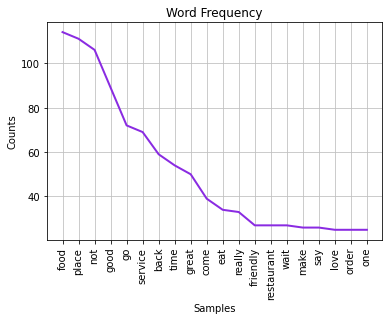

In [35]:
#Get word frequency        
nlp_words = nltk.FreqDist(all_words_list)
plot1 = nlp_words.plot(20, color='blueviolet', title='Word Frequency')

**Visualize the WordCloud**

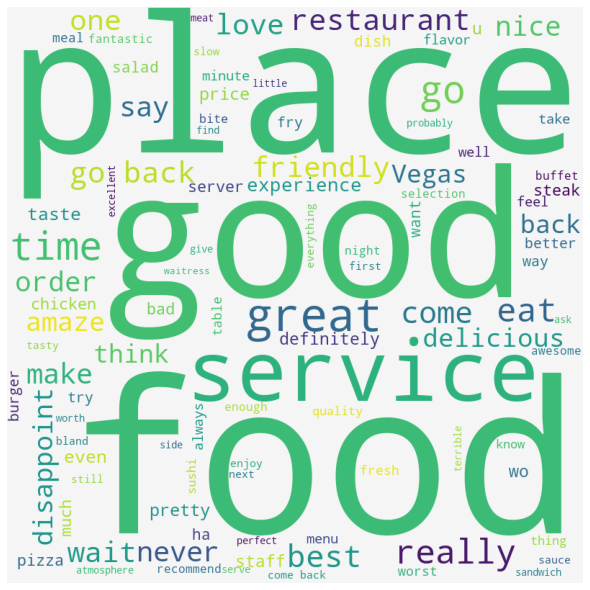

In [36]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='whitesmoke',
                max_words = 100, min_font_size = 10).generate(all_words_string)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

**Visualize Bigrams**

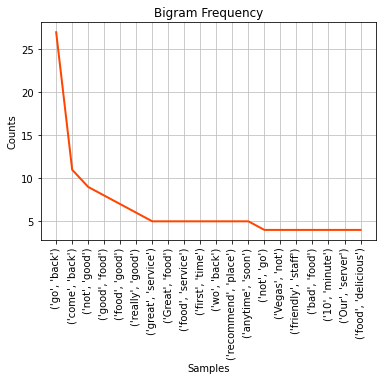

In [37]:
#Bigrams
bigrm = list(nltk.bigrams(all_words_list))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='orangered', title='Bigram Frequency')

**Visualize Trigrams**

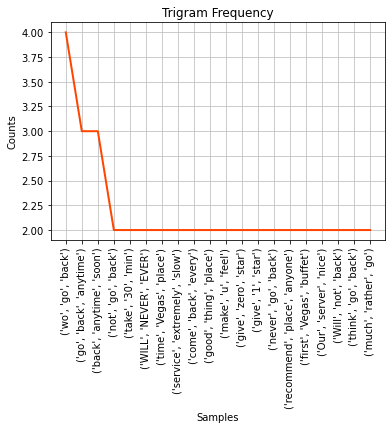

In [38]:
#Trigrams
trigrm = list(nltk.trigrams(all_words_list))
words_2 = nltk.FreqDist(trigrm)
words_2.plot(20, color='orangered', title='Trigram Frequency')

**Obtain and Visualize Polarity**

In [39]:
#Get sentiment from comments
df['comment'] = [str(thing) for thing in df['Review_without_stopwords']]
sentiment = []
for i in range(len(df)):
    blob = TextBlob(df['comment'][i])
    for sentence in blob.sentences:
        sentiment.append(sentence.sentiment.polarity)
df['sentiment']=sentiment

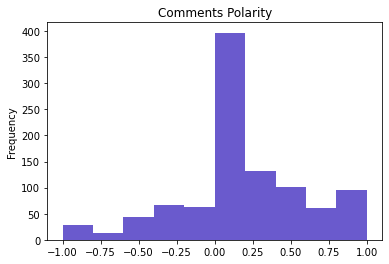

In [40]:
#Plot for polarity
df['sentiment'].plot.hist(color='slateblue', title='Comments Polarity')